In [ ]:
!pip install -q kaggle

#Get kaggle.json from kaggle profile account under api section and upload it
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

!kaggle datasets download -d jehanbhathena/weather-dataset

In [ ]:
!unzip /content/weather-dataset.zip

In [ ]:
import tensorflow as tf

img_width = 250
img_height = 250

batch_size = 64

In [ ]:
base_dir = '/content/dataset'

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6862 files belonging to 11 classes.
Using 5490 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6862 files belonging to 11 classes.
Using 1372 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 250, 250, 3)
(64,)


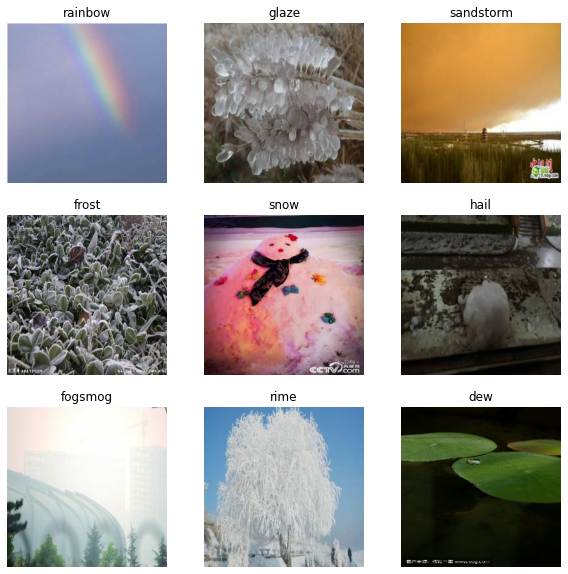

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
import os
import pandas as pd

classes = 11

#make a count of the different classes
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + '/' + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(base_dir, 'train')
print(train_count)

       sandstorm  hail  rainbow  snow  frost  glaze  fogsmog  rime  dew  rain  \
train        692   591      232   621    475    639      851  1160  698   526   

       lightning  
train        377  


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
rescale = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(scale=1./255),
    ]
)

def BuildClassifier(input_shape=(250,250,3)):
  input = tf.keras.Input(shape=input_shape)
  x = rescale(input)

  x = tf.keras.layers.Conv2D(16, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.Conv2D(16, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.MaxPooling2D()(x)

  x = tf.keras.layers.Conv2D(16, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.Conv2D(16, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.MaxPooling2D()(x)

  x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.MaxPooling2D()(x)

  x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.MaxPooling2D()(x)

  x = tf.keras.layers.Conv2D(64, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.Conv2D(64, 3, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.MaxPooling2D()(x)


  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dropout(0.4)(x)
  x = tf.keras.layers.Dense(16)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.4)(x)
  output = tf.keras.layers.Dense(11, activation='softmax')(x)
  model = tf.keras.Model(input, output)

  return model

In [ ]:
model = BuildClassifier()
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 250, 250, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 250, 250, 16)      448       
                                                                 
 batch_normalization_33 (Bat  (None, 250, 250, 16)     64        
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  (None, 250, 250, 16)      0         
                                                                 
 dropout_36 (Dropout)        (None, 250, 250, 16)      0         
                                                           

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0)
mc = ModelCheckpoint(mode='max', filepath='weights.h5', monitor='val_accuracy',save_best_only='True', verbose=1)

In [ ]:
history = model.fit(train_ds ,
          validation_data = val_ds ,
          epochs = 40 ,
          callbacks=[es,mc],
          verbose=1
          ) 

Epoch 1/40
86/86 [==============================] - ETA: 0s - loss: 2.0393 - accuracy: 0.3466
Epoch 1: val_accuracy improved from -inf to 0.11152, saving model to weights.h5
86/86 [==============================] - 38s 409ms/step - loss: 2.0393 - accuracy: 0.3466 - val_loss: 3.3228 - val_accuracy: 0.1115
Epoch 2/40
86/86 [==============================] - ETA: 0s - loss: 1.6434 - accuracy: 0.4730
Epoch 2: val_accuracy did not improve from 0.11152
86/86 [==============================] - 35s 402ms/step - loss: 1.6434 - accuracy: 0.4730 - val_loss: 4.0265 - val_accuracy: 0.1115
Epoch 3/40
86/86 [==============================] - ETA: 0s - loss: 1.5405 - accuracy: 0.4960
Epoch 3: val_accuracy improved from 0.11152 to 0.11662, saving model to weights.h5
86/86 [==============================] - 35s 405ms/step - loss: 1.5405 - accuracy: 0.4960 - val_loss: 3.7084 - val_accuracy: 0.1166
Epoch 4/40
86/86 [==============================] - ETA: 0s - loss: 1.4348 - accuracy: 0.5370
Epoch 4: val_a

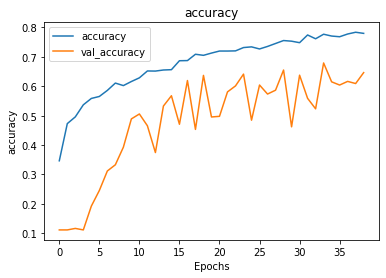

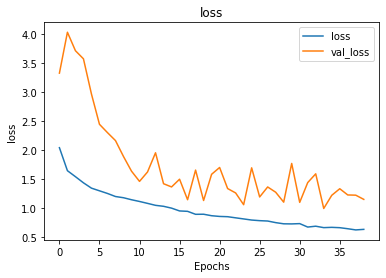

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
trained_model = tf.keras.models.load_model("/content/weights.h5")

In [ ]:
trained_model.evaluate(val_ds)

22/22 [==============================] - 3s 109ms/step - loss: 0.9933 - accuracy: 0.6793


[0.9933045506477356, 0.6793003082275391]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
y_pred = [] 
y_true = []  

for image_batch, label_batch in val_ds:

   y_true.append(label_batch)

   preds = trained_model.predict(image_batch)

   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

Confusion matrix, without normalization


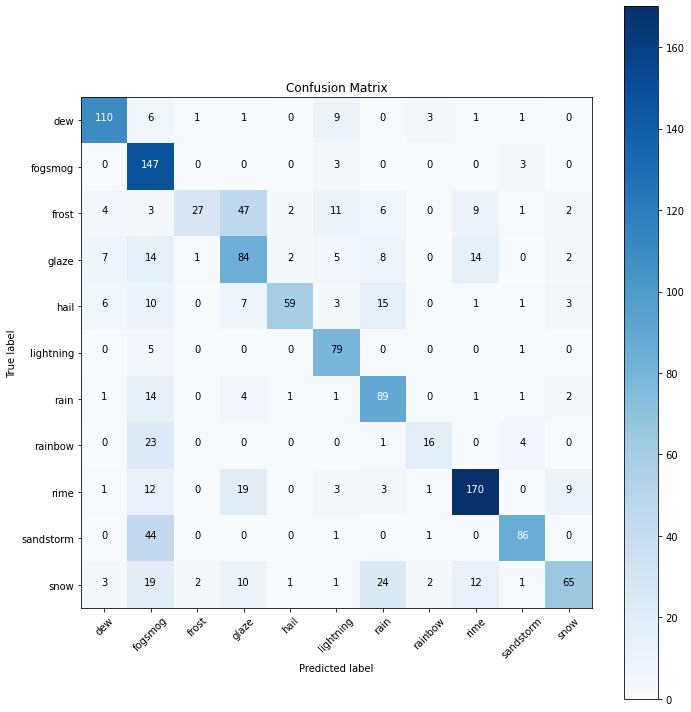

In [ ]:
cm = confusion_matrix(correct_labels, predicted_labels)

plot_confusion_matrix(cm, class_names, normalize=False, title='Confusion Matrix')

Normalized confusion matrix


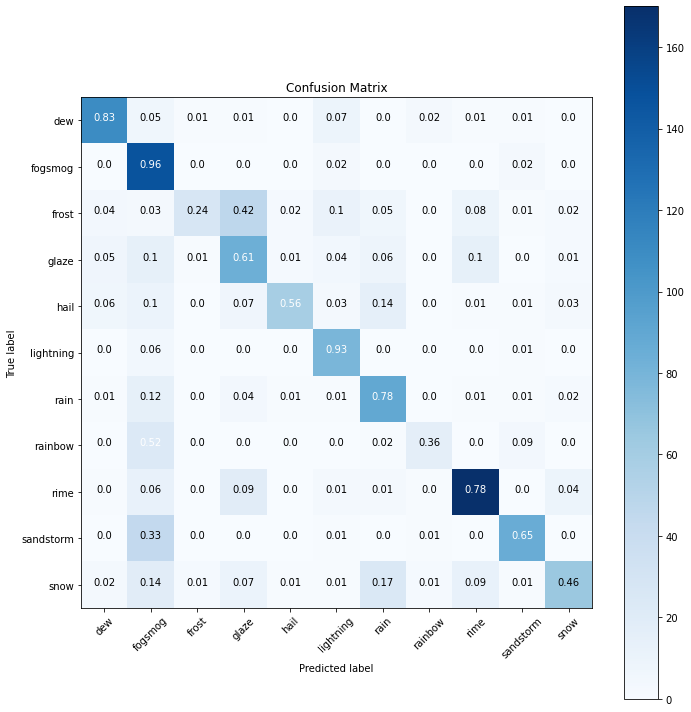

In [ ]:
cm1 = confusion_matrix(correct_labels, predicted_labels)

plot_confusion_matrix(cm1, class_names, normalize=True, title='Confusion Matrix')

In [ ]:
def prediction(image_path):
    img = tf.keras.utils.load_img(
          image_path, target_size=(img_height, img_width))

    img = tf.keras.utils.img_to_array(img)
        
    plt.title('Image')
    plt.axis('off')
    plt.imshow((img/255.0).squeeze())
        
    predict = model.predict(img[np.newaxis , ...])
    predicted_class = class_names[np.argmax(predict[0] , axis = -1)]
        
    print('Prediction Value: ' , np.max(predict[0] , axis = -1))
    print("Classified:",predicted_class)

Prediction Value:  0.97975916
Classified: dew


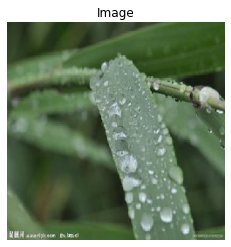

In [ ]:
prediction('/content/dataset/dew/2209.jpg')